# Goal
1. get the overall store performance
2. get the every store number performance
3. can tell which family items are purchased the most
4. can tell if the promotion can affect the sales


# Importing Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read The Data

In [ ]:
train = pd.read_csv('../input/store-sales-time-series-forecasting/train.csv')
test = pd.read_csv('../input/store-sales-time-series-forecasting/test.csv')
stores = pd.read_csv('../input/store-sales-time-series-forecasting/stores.csv')
trx = pd.read_csv('../input/store-sales-time-series-forecasting/transactions.csv')
oil = pd.read_csv('../input/store-sales-time-series-forecasting/oil.csv')
hol_events = pd.read_csv('../input/store-sales-time-series-forecasting/holidays_events.csv')
sample1 = pd.read_csv('../input/store-sales-time-series-forecasting/sample_submission.csv')

trx['date'] = pd.to_datetime(trx.date)
train['date'] = pd.to_datetime(train.date)
test['date'] = pd.to_datetime(test.date)

# Quick Review About The Store Performance

In [ ]:
fig , ax = plt.subplots(1,1,figsize =(15,6))
year_trx = []

trx = trx.set_index('date')
total_trx = trx.groupby(pd.Grouper(freq = 'Y')).sum()

for i in range(2013,2018):
    year_trx.append(i)
    
year_trx = pd.DataFrame(year_trx,columns = ['date'])
year_trx['transactions'] = total_trx.reset_index()['transactions']

ax.bar(year_trx['date'] , year_trx['transactions'],
       width=0.5 , linewidth=1,edgecolor='Black', color='#ffcdb2')

for j in year_trx.index:
    ax.annotate(year_trx['transactions'].loc[j],
                xy = (year_trx['date'].loc[j],year_trx['transactions'].loc[j] + 1000000),
                va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize = 12,
                color='Black')

ax.set(xlabel = 'Year',ylabel = 'Transactions')
ax.set_ylim(0, 36000001)
ax.set_yticklabels(np.arange(0,350000001, 5000000),fontfamily='serif')
ax.set_xticklabels(np.arange(2012,2018,1),fontfamily = 'serif')
fig.text(0.12, 0.90, 'Total Transactions of All Stores Over The Year', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

In [ ]:
fig , ax = plt.subplots(1,1,figsize =(15,6))
year_sales = []

temp_train = train.set_index('date')
total_sales = temp_train.groupby(pd.Grouper(freq = 'Y')).sum()

for i in range(2013,2018):
    year_sales.append(i)
    
year_sales = pd.DataFrame(year_sales,columns = ['date'])
year_sales['sales'] = total_sales.reset_index().round(2)['sales']

ax.bar(year_sales['date'] , year_sales['sales'] ,
       width = 0.5 , linewidth = 1,edgecolor = 'Black', color = '#ffcdb2')

for j in year_sales.index:
    ax.annotate(year_sales['sales'].loc[j],
                xy = (year_sales['date'].loc[j],year_sales['sales'].loc[j] + 10000000),
                va = 'center', ha='center',fontweight='light', fontfamily='serif',fontsize = 12,
                color='Black')
    
    
ax.set_ylim(0, 350000000)
ax.set_yticklabels(np.arange(0,350000001, 50000000),fontfamily='serif')
ax.set_xticklabels(np.arange(2012,2018,1),fontfamily = 'serif')
fig.text(0.12, 0.90, 'Total Sales of All Stores Over The Year', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

In [ ]:
fig , ax = plt.subplots(1,1,figsize = (12,10))

family_sales = train.groupby('family').sum().sort_values(by = 'sales',ascending = True)
ax.barh(family_sales.index,family_sales['sales'],linewidth = 1,edgecolor = 'Black', color = '#ffcdb2')

ax.set_xlim(0, 350000000)
ax.set_xticklabels(np.arange(0,350000001, 50000000),fontfamily='sansserif',color = 'Black')
ax.set_yticklabels(family_sales.index,fontfamily = 'sansserif',color = 'Black')
fig.text(0.125, 0.89, 'Total Family Sales From 2013 - 2017', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='x', linestyle='-', alpha=0.4) 
plt.show()

In [ ]:
fig , ax = plt.subplots(9,6,figsize = (20,25))

temp_train = train.set_index('date')
temp_train = temp_train.groupby([pd.Grouper(freq = 'Y'),'store_nbr']).sum().reset_index()
counter = 1

fig.suptitle('Every Store Sales Over The Year',x = 0.5,y = 1,fontweight='bold', fontfamily='serif',fontsize = 24,color='Black')

fig.text(0.5, -0.01,'Year', ha='center',fontweight='bold', fontfamily='sansserif',fontsize = 16,color='Black')
fig.text(-0.01,0.5,'Sales', va='center', rotation='vertical',fontweight='bold', fontfamily='sansserif',fontsize = 16,color='Black')

for i in range(0,9):
    for j in range(0,6):
        temp = temp_train[temp_train['store_nbr'] == counter]
        ax[i,j].plot(temp['date'].dt.year,temp['sales'])
        ax[i,j].set_title(f"Store Number {counter}")
        counter += 1
        

plt.tight_layout()
plt.show()

# Linear Regression
In this section I created a code that can build a linear regression model and directly predict it. The steps of the code are as follows:

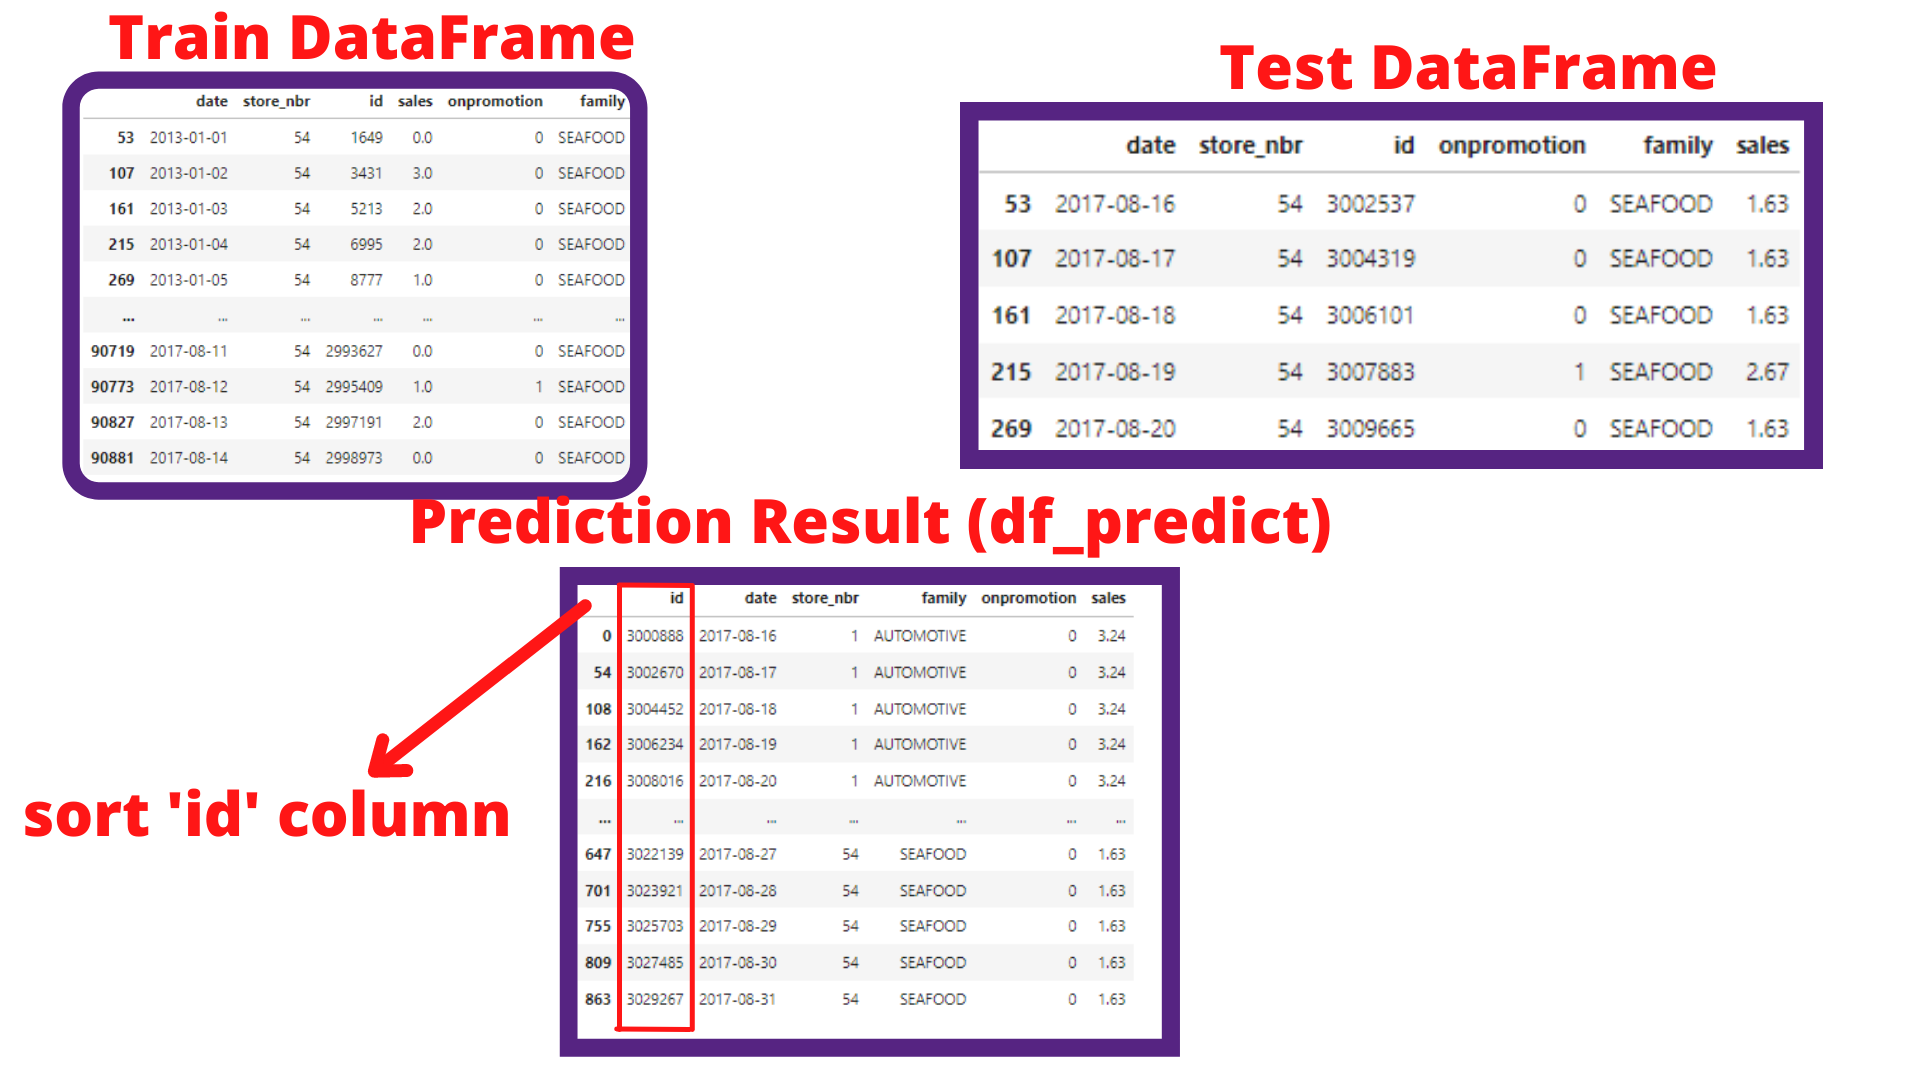

I first grouped the train dataset by store number and product family and then created a temporary dataframe named 'train_temp'. Based on the temporary dataframe, I created a linear regression model by making sales as the dependent variable and onpromotion as the independent variable. I also grouped the test dataset by store number and product family and store them into the temporary dataframe 'test_temp'. I used onpromotion input on 'test_temp' to do the forecast/prediction.

The results of these predictions are then stored into the 'df_predict' dataframe step by step. The data submitted to 'df_predict' is of course sequentially according to the store number and product family. But on 'df_predict' it still holds column 'id'. So we can sort that column and the prediction results can be sequential according to sample submission format and then we can submit it.

In [ ]:
list_of_family = train['family'].unique()
list_of_storenbr = np.sort(train['store_nbr'].unique())

In [ ]:
df_predict = test.loc[:2]
df_predict['sales'] = 0

for i in range(0,len(list_of_family)):
    for j in list_of_storenbr:
        train_temp = train[train['family'] == list_of_family[i]].set_index('date').groupby([pd.Grouper(freq = 'D'),'store_nbr']).sum().reset_index()
        test_temp = test[test['family'] == list_of_family[i]].set_index('date').groupby([pd.Grouper(freq = 'D'),'store_nbr']).sum().reset_index()
        test_temp['family'] = list_of_family[i]
        
        train_temp = train_temp[train_temp['store_nbr'] == j]
        test_temp = test_temp[test_temp['store_nbr'] == j]
        model = LinearRegression()
        model.fit(train_temp.iloc[:,4:],train_temp.iloc[:,3:4])
        test_predictions = model.predict(test_temp.iloc[:,3:4])
        test_temp['sales'] = test_predictions.round(2)
        
        df_predict = pd.concat([df_predict,test_temp])
        
df_predict = df_predict[3:]
df_predict.sort_values('id',ascending = True,inplace = True)

In [ ]:
sample = df_predict[['id','sales']]

In [ ]:
sample.to_csv('sample_submission.csv',index=False)

#### I'm new to statistics and data science. So i can only do this with my basic knowledge. Maybe if I get to more advanced things I'll go back to this notebook and fix this code ️😊